<class 'pandas.core.frame.DataFrame'>
epochs and learning rate  100000 1e-05
final weights  [[-0.08261463]
 [-0.11237918]
 [-0.11763179]
 [-0.09640783]
 [-0.06733071]
 [-0.11673598]
 [-0.09367983]
 [-0.11178552]]
wo  -3.388337407082282
Calculations done on validation data
Accuracy is  72.58064516129032  %
Calculations done on testing data
Accuracy is  67.88617886178862  %


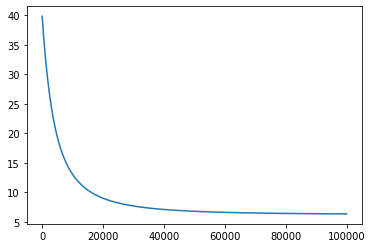

In [151]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt 
from sklearn import preprocessing

#reading the dataset
preData = pd.read_csv("diabetes.csv")
print(type(preData))
preData.head()
#print(preData)
data = preprocessing.normalize(preData, axis=0)
data = pd.DataFrame(data, columns=preData.columns)
#print(data.head())
features = np.asmatrix(data[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']])
target = np.asmatrix(data['Outcome']).T
#splitting the dataset into training(60%), validation(20%) and testing(rest) using sklearn
#first splitting dataset into 2 sets, 1 is training i.e 60% and the 2nd one is temp dataset which is 40%
X_training, X_temp, Y_training, Y_temp = train_test_split(features,target, test_size=0.40)
#again splitting the temp data into 2 portions, 1 is validation(20$) and rest for testing
X_testing,X_validation,Y_testing,Y_validation = train_test_split(X_temp, Y_temp, test_size=0.20)
#creating the weight matrix
w = np.asmatrix([0,0,0,0,0,0,0,0]).T
n = 8
epochs =100000
learningRate = 0.00001
#setting the bias w0 as 0 initially
w0 = 0
lossFunction= [] 
for iteration in range(epochs):
    #predicting the outcome
    Y_predicted = 1/(1+ np.exp(-w0-np.dot(X_training,w)))
    #generating the gradient desc
    gradient_desc = np.dot(X_training.T,(Y_predicted-Y_training))
    #updating bias and weights using gradient descent
    w0 = w0 - learningRate*(np.sum(Y_predicted - Y_training)/n)
    w = w - learningRate * gradient_desc/n
    cost = -np.sum(np.multiply(np.log(Y_predicted), Y_training) + np.multiply((1 - Y_training), np.log(1 - Y_predicted)))/n
    lossFunction.append(np.squeeze(cost)) 
print("epochs and learning rate ",epochs,learningRate)
print("final weights ",w)
print("wo ",w0)
#normalizing the validation dataset
X_validation_norm = X_validation - X_validation.mean()
#predicting the outcome using validation dataset with the weights found using training dataset
Y_predicted = 1/(1+ np.exp(-w0-np.dot(X_validation_norm,w)))
#converting the predicted outcome probabilities into binary form
predictedTest = [1 if p>=0.5 else 0 for p in Y_predicted]
print("Calculations done on validation data")
properly_Predicted = 0
#calculating the accuray using validation dataset
for i in range(len(Y_validation)):
    if(predictedTest[i]==Y_validation[i][0]):
        properly_Predicted = properly_Predicted+1

accuracy = properly_Predicted/len(Y_validation)
print("Accuracy is ",accuracy*100," %")
X_testing_norm = X_testing - X_testing.mean()
#predicting the outcome using testing dataset with the weights found using training dataset
Y_predicted = 1/(1+ np.exp(-w0-np.dot(X_testing_norm,w)))
#converting the predicted outcome probabilities into binary form
predictedTest = [1 if p>=0.5 else 0 for p in Y_predicted]
print("Calculations done on testing data")
properly_Predicted = 0
#calculating the accuray using testing dataset
for i in range(len(Y_testing)):
    if(predictedTest[i]==Y_testing[i][0]):
        properly_Predicted = properly_Predicted+1

accuracy = properly_Predicted/len(Y_testing)
print("Accuracy is ",accuracy*100," %")
plt.plot(lossFunction)